/var/folders/s4/45_flvp97rz1sb2nz_0sy4s00000gn/T/ipykernel_92151/3016206323.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


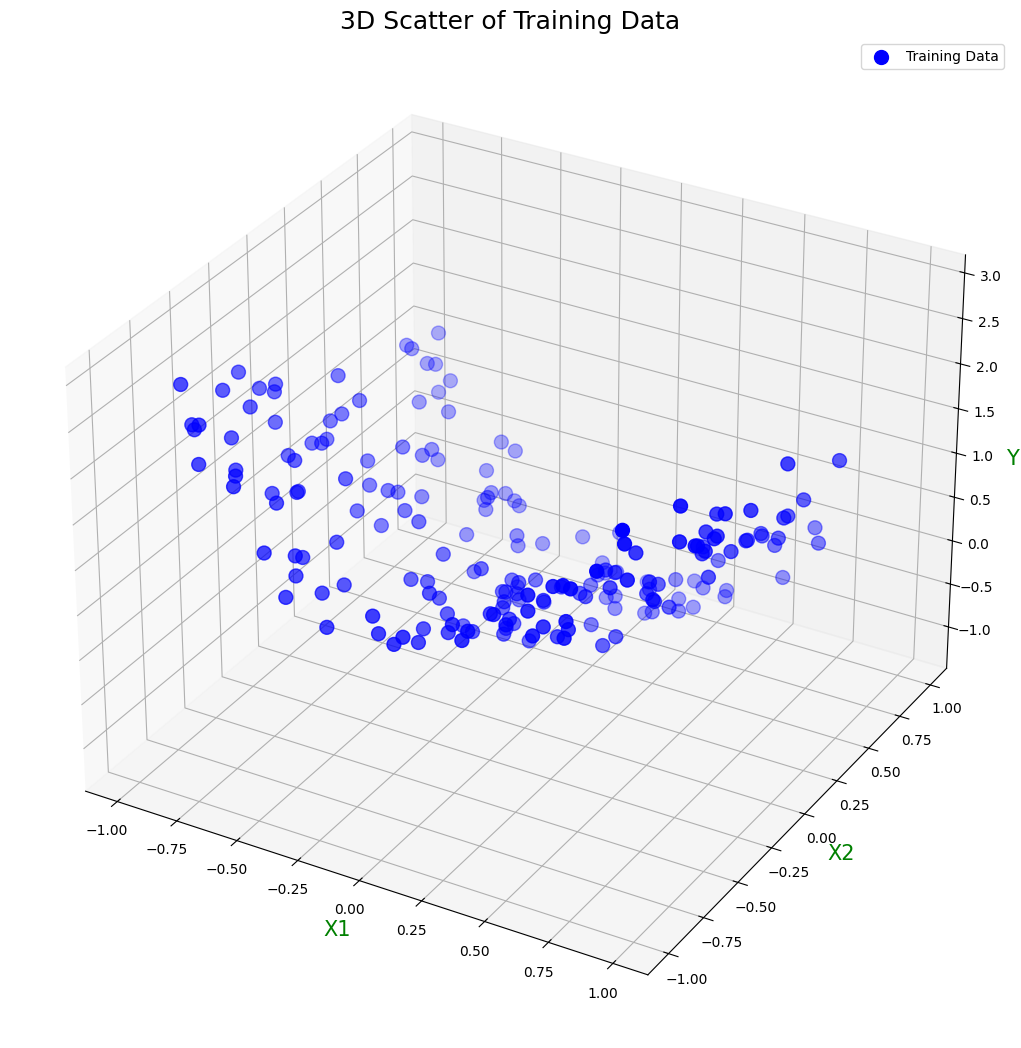

In [126]:
# id= 9-18--9 
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.dummy import DummyRegressor

# Load dataset
df = pd.read_csv("week3.csv")
X1, X2 = df.iloc[:, 0], df.iloc[:, 1]
X = np.column_stack((X1, X2))
y = df.iloc[:, 2]
# i.a:
# 3D Scatter Plot for visualization of the data
fig = plt.figure(figsize=(15,13))
ax = fig.add_subplot(111, projection='3d')
ax.legend()
ax.scatter(X[:, 0], X[:, 1], y, label="Training Data",s=100,  c='blue')
ax.set_xlabel('X1', fontsize=15, color='green')
ax.set_ylabel('X2', fontsize=15, color='green')
ax.set_zlabel('Y',fontsize=15, color='green')
plt.title("3D Scatter of Training Data", fontsize=18)

plt.legend()
plt.show()

Lasso Regression with C=0.1
Coefficients: [ 0.  0. -0.  0. -0. -0.  0. -0.  0. -0.  0. -0.  0. -0.  0.  0. -0.  0.
 -0.  0. -0.]
Intercept: 0.6967927481638495
R-squared: 0.0

Lasso Regression with C=1
Coefficients: [ 0.  0. -0.  0. -0. -0.  0. -0.  0. -0.  0. -0.  0. -0.  0.  0. -0.  0.
 -0.  0. -0.]
Intercept: 0.6967927481638495
R-squared: 0.0

Lasso Regression with C=10
Coefficients: [ 0.         -0.         -0.7384091   1.02790691 -0.         -0.
 -0.         -0.         -0.         -0.          0.         -0.
  0.         -0.          0.          0.         -0.         -0.
 -0.         -0.         -0.        ]
Intercept: 0.31991952222391434
R-squared: 0.7857167953111093

Lasso Regression with C=50
Coefficients: [ 0.          0.         -0.96134575  1.88589431 -0.         -0.
  0.         -0.         -0.         -0.          0.         -0.
  0.         -0.          0.          0.         -0.         -0.
 -0.         -0.         -0.        ]
Intercept: 0.016750701808386337
R-squared:

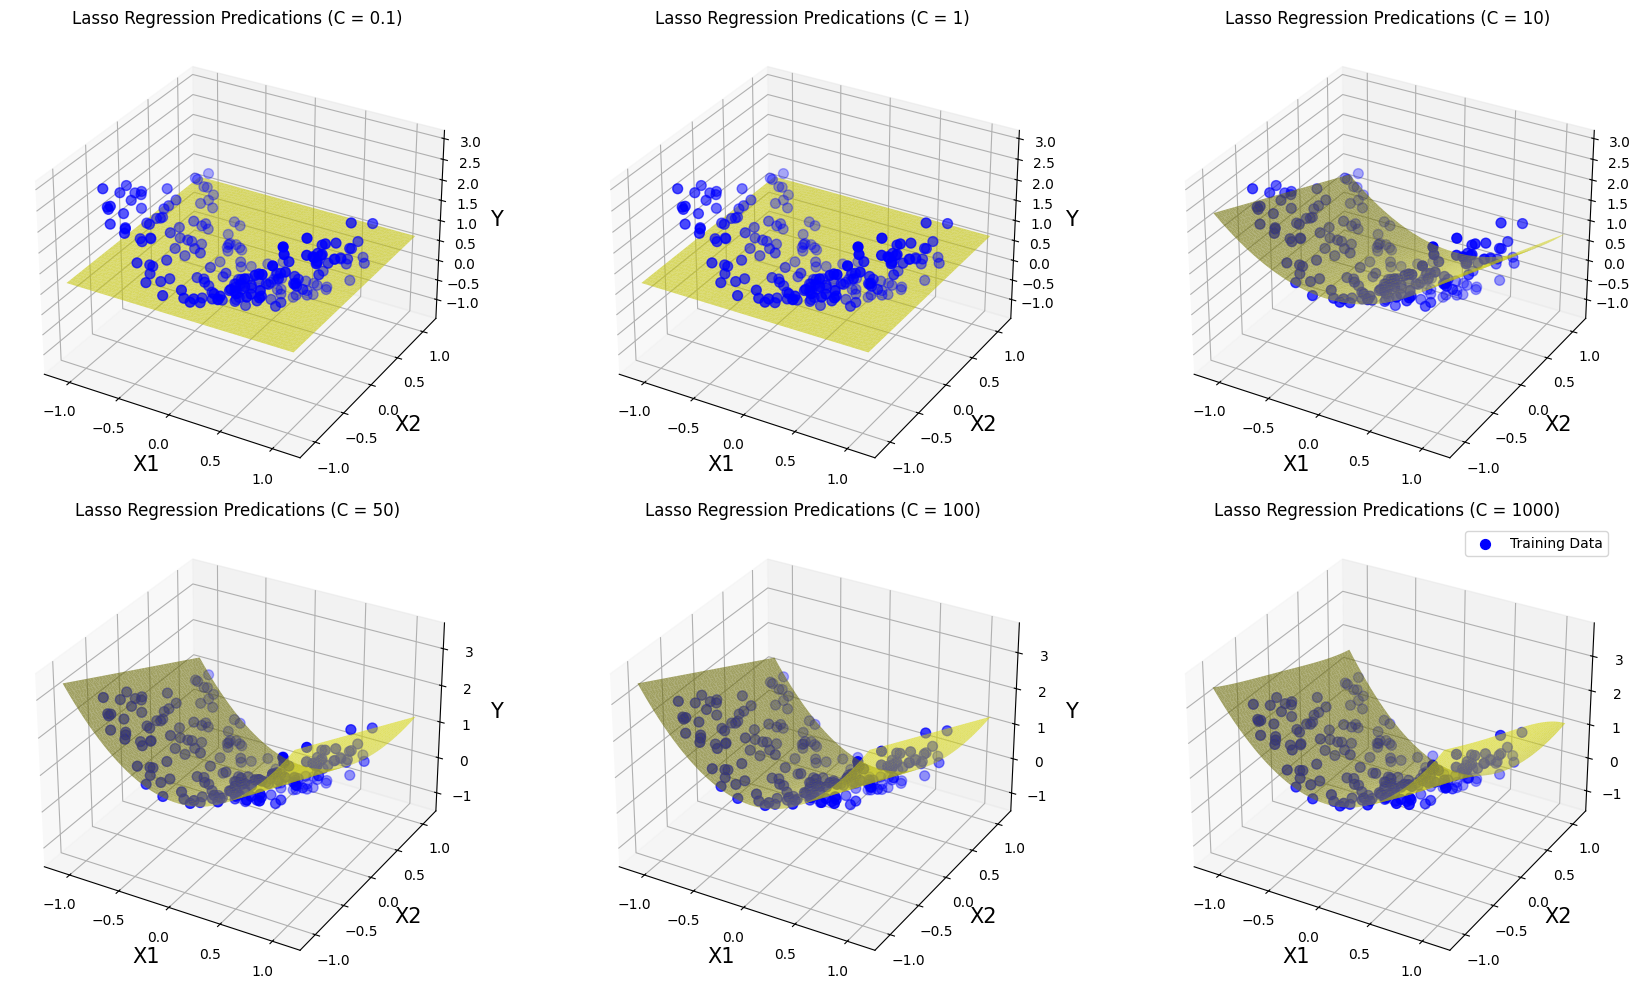

In [94]:
#i.b,c:
# Generate polynomial features up to degree 5
poly = PolynomialFeatures(degree=5)
X_poly = poly.fit_transform(X)

# Create grid for prediction
grid_range = np.linspace(-1.1, 1.1)
grid_points = np.array([[i, j] for i in grid_range for j in grid_range])
X_grid_poly = poly.transform(grid_points)

# Train Lasso regression with varying regularization strengths
C_values = [0.1, 1, 10, 50, 100, 1000]

# Set up figure for plotting 6 outputs: 2 rows, 3 plots per row
fig, axes = plt.subplots(2, 3, figsize=(18, 10), subplot_kw={'projection': '3d'})
axes = axes.ravel()

for i,C_value in enumerate(C_values):
    alpha = 1 / C_value
    lasso_model = Lasso(alpha=alpha, max_iter=10000).fit(X_poly, y)
    
    print(f"Lasso Regression with C={C_value}")
    print(f"Coefficients: {lasso_model.coef_}")
    print(f"Intercept: {lasso_model.intercept_}")
    print(f"R-squared: {lasso_model.score(X_poly, y)}")
    print()

    y_pred_lasso = lasso_model.predict(X_grid_poly)

    # 3D Plot for Lasso predictions
    ax = axes[i]
    ax.plot_trisurf(grid_points[:, 0], grid_points[:, 1], y_pred_lasso, color='yellow', alpha=0.6)
    ax.scatter(X[:, 0], X[:, 1], y, color='blue', s=50, label="Training Data")
    ax.set_xlabel('X1', fontsize=15)
    ax.set_ylabel('X2', fontsize=15)
    ax.set_zlabel('Y', fontsize=15)
    ax.set_title(f'Lasso Regression Predications (C = {C_value})', fontsize=12)
    
 
    
plt.legend()
plt.tight_layout()
plt.show()



Ridge Regression with C=0.0001
Coefficients: [ 0.00000000e+00  4.31037923e-04 -1.35210021e-02  7.86060038e-03
 -9.82244345e-05 -1.96632401e-04  2.90959417e-04 -4.61339266e-03
  2.87135675e-04 -7.97896539e-03  6.52426806e-03 -3.59968456e-05
  2.44546474e-03 -6.60876966e-04  6.13283102e-05  2.49866859e-04
 -2.82309682e-03  2.12891908e-04 -2.54877200e-03  3.46086423e-04
 -5.48140156e-03]
Intercept: 0.6918229237532616
R-squared: 0.02652746287931107

Ridge Regression with C=0.1
Coefficients: [ 0.          0.01313886 -0.75370114  1.09000795 -0.04134881 -0.08866898
 -0.0071571  -0.08356905 -0.04691502 -0.27284057  0.74221034  0.01315577
  0.25183425 -0.06957971 -0.03197459  0.00786481 -0.00641949 -0.0384667
 -0.00779489 -0.06481124 -0.07960392]
Intercept: 0.13834057954567802
R-squared: 0.9352378560420349

Ridge Regression with C=1
Coefficients: [ 0.          0.02532295 -0.94884959  1.63922278 -0.13938343 -0.13296667
 -0.07120239  0.06757419 -0.04019739 -0.23892334  0.42873572  0.18735291
  0.

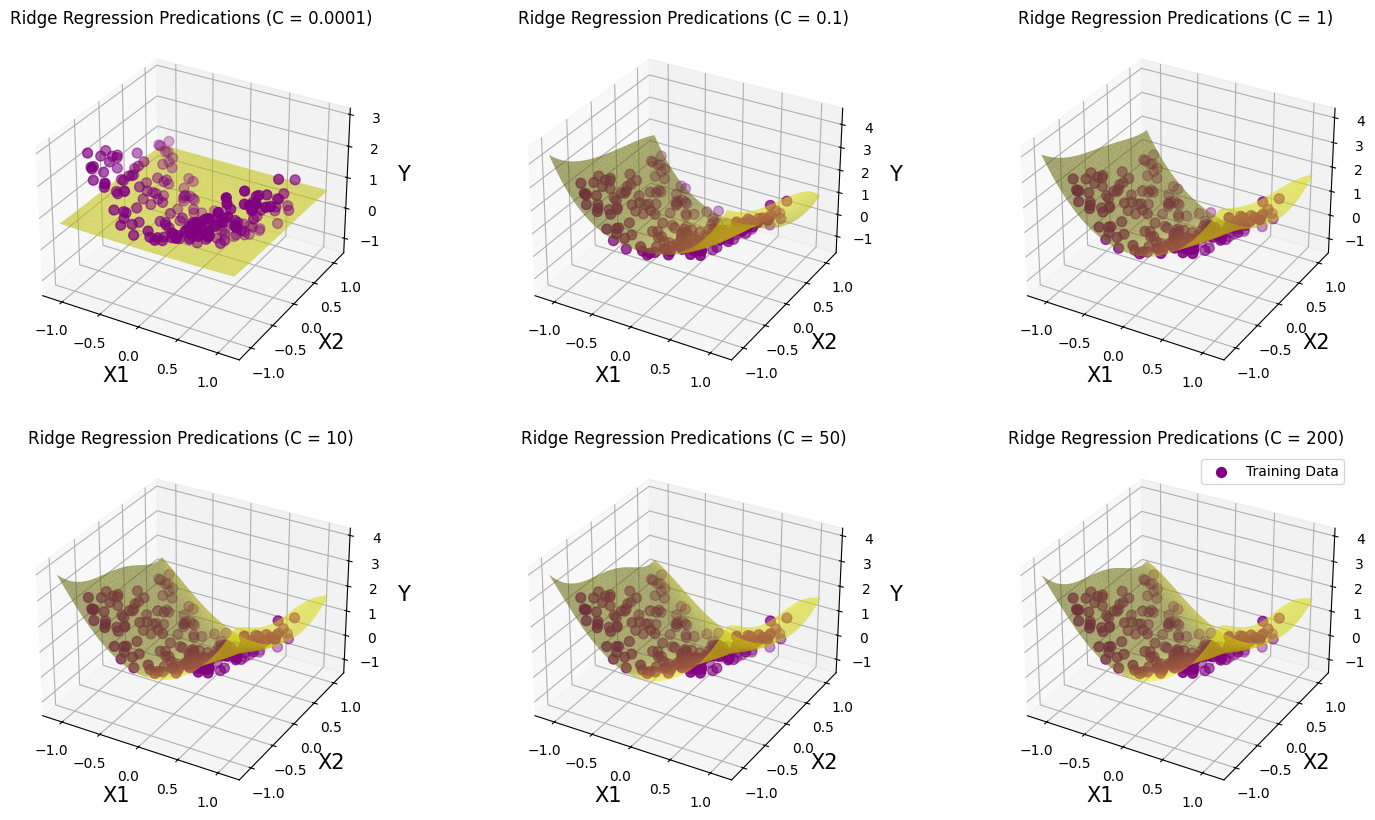

In [95]:
# i.e:
# Ridge regression model
C_values_ridge = [0.0001, 0.1, 1, 10, 50, 200]

# Set up figure for plotting 6 outputs: 2 rows, 3 plots per row
fig, axes = plt.subplots(2, 3, figsize=(18, 10), subplot_kw={'projection': '3d'})

# Flatten the axes array for easier indexing in the loop
axes = axes.ravel()

for i,C_value in enumerate(C_values_ridge):
    alpha_ridge = 1 / (2 * C_value)
    ridge_model = Ridge(alpha=alpha_ridge, max_iter=10000).fit(X_poly, y)
    
    print(f"Ridge Regression with C={C_value}")
    print(f"Coefficients: {ridge_model.coef_}")
    print(f"Intercept: {ridge_model.intercept_}")
    print(f"R-squared: {ridge_model.score(X_poly, y)}")
    print()

    y_pred_ridge = ridge_model.predict(X_grid_poly)

    # 3D Plot for Ridge predictions
    
    ax = axes[i]
    ax.plot_trisurf(grid_points[:, 0], grid_points[:, 1], y_pred_ridge, color='yellow', alpha=0.6)
    ax.scatter(X[:, 0], X[:, 1], y, color='purple', s=50, label="Training Data")
    ax.set_xlabel('X1', fontsize=15)
    ax.set_ylabel('X2', fontsize=15)
    ax.set_zlabel('Y', fontsize=15)
    ax.set_title(f'Ridge Regression Predications (C = {C_value})', fontsize=12)
    
plt.legend(loc=1)
plt.show()

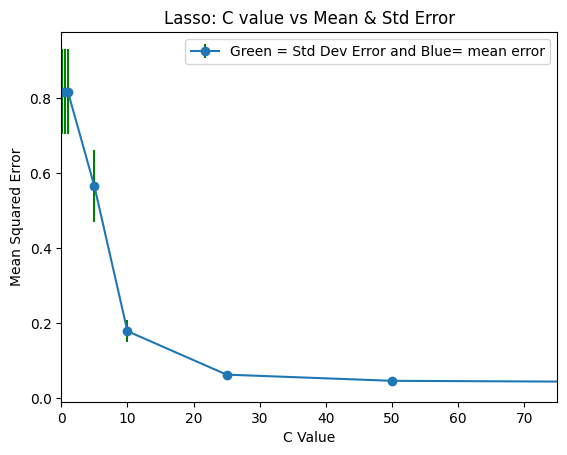

Mean Errors: [0.8180823592813997, 0.8180823592813997, 0.8180823592813997, 0.5663041922636582, 0.17887090846170756, 0.06284177008586385, 0.04634590090120405, 0.04225586719056971]
Standard Deviations: [0.11418254449116705, 0.11418254449116705, 0.11418254449116705, 0.09555381306922366, 0.030111744069089473, 0.00888349119221524, 0.006956102711395835, 0.006882607043643638]


In [96]:
# ii.a,b:
# Lasso Cross-Validation for model selection
C_values_cv = [0.1, 0.5, 1, 5, 10, 25, 50, 100]
mean_errors = []
std_errors = []
# Loop through each value of C
for Ci in C_values_cv:
    lasso_cv = Lasso(alpha=1 / Ci)  # Lasso model for current C value
    temp_errors = []  # To store the errors for each fold
    
    # 5-fold cross-validation
    kfold = KFold(n_splits=5)
    for train_idx, test_idx in kfold.split(X_poly):
        lasso_cv.fit(X_poly[train_idx], y[train_idx])
        y_pred = lasso_cv.predict(X_poly[test_idx])
        
        # Calculate and store the mean squared error for this fold
        temp_errors.append(mean_squared_error(y[test_idx], y_pred))
    
    # Calculate the mean and standard deviation of the MSEs for this C value
    mean_errors.append(np.mean(temp_errors))
    std_errors.append(np.std(temp_errors))

mean_errors = [float(x) for x in mean_errors]
std_errors = [float(x) for x in std_errors]
# Plotting the error bars
plt.errorbar(C_values_cv, mean_errors, yerr=std_errors, fmt='o-', ecolor='green')
plt.xlabel('C Value')
plt.ylabel('Mean Squared Error')
plt.legend(["Green = Std Dev Error and Blue= mean error" ], loc=1, fontsize=10)
plt.title("Lasso: C value vs Mean & Std Error")
plt.xlim((0, 75))
plt.show()

# Output the results
print("Mean Errors:", mean_errors)
print("Standard Deviations:", std_errors)


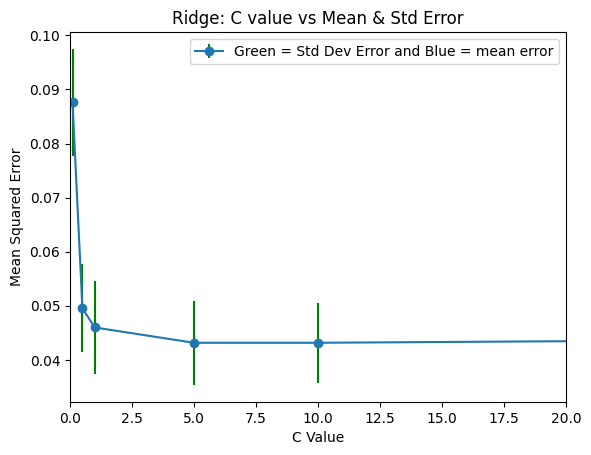

Mean Errors: [0.08762142633412331, 0.04951456519956229, 0.04598784884132616, 0.04315775914137789, 0.04315842070586304, 0.04359297395964104, 0.04397799487064662, 0.04428718990038555]
Standard Deviations: [0.009877568611023275, 0.008128275416248104, 0.008518324541958975, 0.007791928641356159, 0.007353891961897938, 0.0070708475052672064, 0.00703280059434011, 0.007051810828594466]


In [97]:
# ii.c:
C_values_cv = [0.1, 0.5, 1, 5, 10, 25, 50, 100]
mean_error_R = []
std_error_R = []

# Loop through each value of C
for Ci in C_values_cv:
    ridge_cv = Ridge(alpha=1 / Ci)  # Ridge model for current C value
    temp_errors = []  # To store errors
    
    # 5-fold cross-validation
    kfold = KFold(n_splits=5)
    for train_idx, test_idx in kfold.split(X_poly):
        ridge_cv.fit(X_poly[train_idx], y[train_idx])
        y_pred = ridge_cv.predict(X_poly[test_idx])
        
        # Calculate and store the mean squared error for this fold
        temp_errors.append(mean_squared_error(y[test_idx], y_pred))
    
    # Calculate the mean and standard deviation of the MSEs for this C value
    mean_error_R.append(np.mean(temp_errors))
    std_error_R.append(np.std(temp_errors))
    
mean_error_R = [float(x) for x in mean_error_R]
std_error_R = [float(x) for x in std_error_R]
# Plotting the error bars
plt.errorbar(C_values_cv, mean_error_R, yerr=std_error_R, fmt='o-', ecolor='green')
plt.xlabel('C Value')
plt.ylabel('Mean Squared Error')
plt.legend(["Green = Std Dev Error and Blue = mean error"], loc=1, fontsize=10)
plt.title("Ridge: C value vs Mean & Std Error")
plt.xlim((0, 20))
plt.show()

# Output the results
print("Mean Errors:", mean_error_R)
print("Standard Deviations:", std_error_R)

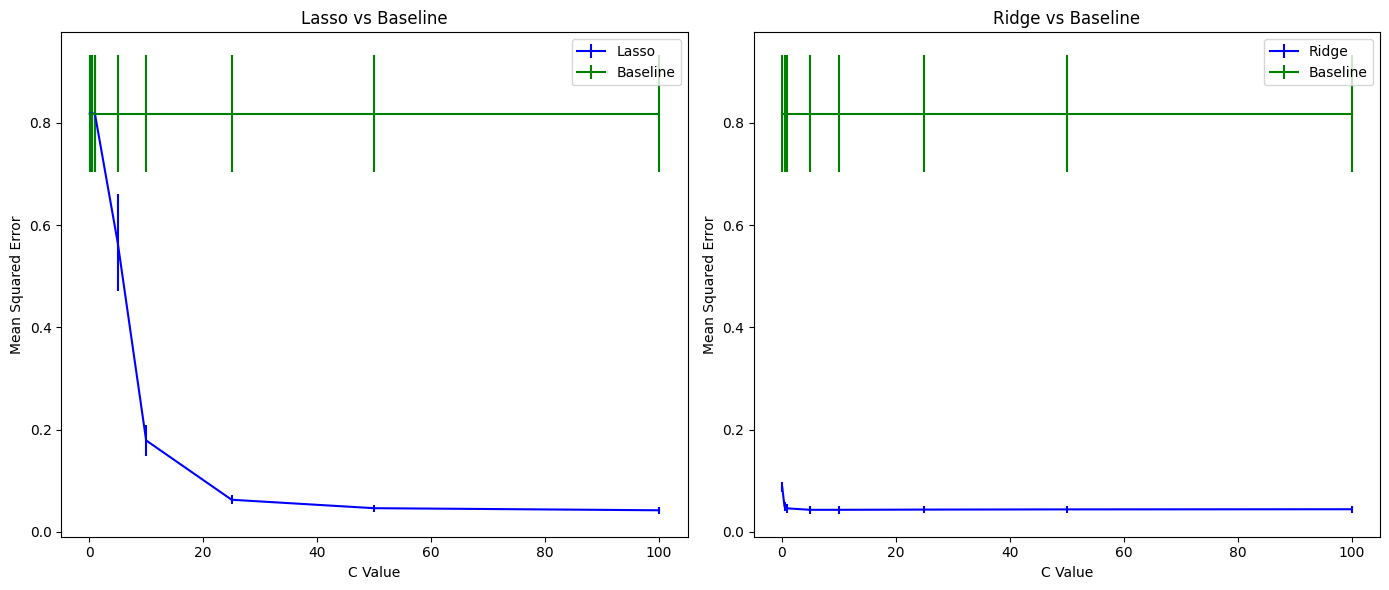

Baseline Mean Errors (Lasso comparison): [0.8180823592813997, 0.8180823592813997, 0.8180823592813997, 0.8180823592813997, 0.8180823592813997, 0.8180823592813997, 0.8180823592813997, 0.8180823592813997]
Lasso Mean Errors: [0.8180823592813997, 0.8180823592813997, 0.8180823592813997, 0.5663041922636582, 0.17887090846170756, 0.06284177008586385, 0.04634590090120405, 0.04225586719056971]
Baseline Mean Errors (Ridge comparison): [np.float64(0.8180823592813997), np.float64(0.8180823592813997), np.float64(0.8180823592813997), np.float64(0.8180823592813997), np.float64(0.8180823592813997), np.float64(0.8180823592813997), np.float64(0.8180823592813997), np.float64(0.8180823592813997)]
Ridge Mean Errors: [0.08762142633412331, 0.04951456519956229, 0.04598784884132616, 0.04315775914137789, 0.04315842070586304, 0.04359297395964104, 0.04397799487064662, 0.04428718990038555]


In [98]:
# C values for cross-validation
C_values_cv = [0.1, 0.5, 1, 5, 10, 25, 50, 100]

# Lasso and Baseline
mean_error = []
std_error = []
mean_error1 = []
std_error1 = []

# Lasso and Baseline comparison
for Ci in C_values_cv:
    lasso_model = Lasso(alpha=1 / Ci)  # Lasso model
    baseline_model = DummyRegressor(strategy="mean")  # Baseline model
    
    temp_error_lasso = []
    temp_error_baseline = []

    # 5-fold cross-validation
    kfold = KFold(n_splits=5)
    for train_idx, test_idx in kfold.split(X_poly):
        # Lasso model fitting and prediction
        lasso_model.fit(X_poly[train_idx], y[train_idx])
        y_pred_lasso = lasso_model.predict(X_poly[test_idx])
        temp_error_lasso.append(mean_squared_error(y[test_idx], y_pred_lasso))
        
        # Baseline model fitting and prediction
        baseline_model.fit(X_poly[train_idx], y[train_idx])
        y_pred_baseline = baseline_model.predict(X_poly[test_idx])
        temp_error_baseline.append(mean_squared_error(y[test_idx], y_pred_baseline))
    
    #  mean and standard deviation
    mean_error.append(np.mean(temp_error_lasso))
    std_error.append(np.std(temp_error_lasso))
    mean_error1.append(np.mean(temp_error_baseline))
    std_error1.append(np.std(temp_error_baseline))

# lists for storing mean and std errors for Ridge and Baseline
mean_error_R = []
std_error_R = []
mean_error_baseline = []
std_error_baseline = []

# Ridge and Baseline comparison
for Ci in C_values_cv:
    ridge_model = Ridge(alpha=1 / Ci)  # Ridge model
    baseline_model = DummyRegressor(strategy="mean")  # Baseline model
    
    temp_error_ridge = []
    temp_error_baseline_ridge = []

    # 5-fold cross-validation
    kfold = KFold(n_splits=5)
    for train_idx, test_idx in kfold.split(X_poly):
        # Ridge model fitting and prediction
        ridge_model.fit(X_poly[train_idx], y[train_idx])
        y_pred_ridge = ridge_model.predict(X_poly[test_idx])
        temp_error_ridge.append(mean_squared_error(y[test_idx], y_pred_ridge))
        
        # Baseline model fitting and prediction
        baseline_model.fit(X_poly[train_idx], y[train_idx])
        y_pred_baseline_ridge = baseline_model.predict(X_poly[test_idx])
        temp_error_baseline_ridge.append(mean_squared_error(y[test_idx], y_pred_baseline_ridge))
    
    # mean and standard deviation of errors for Ridge and Baseline
    mean_error_R.append(np.mean(temp_error_ridge))
    std_error_R.append(np.std(temp_error_ridge))
    mean_error_baseline.append(np.mean(temp_error_baseline_ridge))
    std_error_baseline.append(np.std(temp_error_baseline_ridge))
    
mean_error_R = [float(x) for x in mean_error_R]
std_error_R = [float(x) for x in std_error_R]
mean_error = [float(x) for x in mean_error]
std_error = [float(x) for x in std_error]
mean_error1 = [float(x) for x in mean_error1]
std_error1 = [float(x) for x in std_error1]

# Lasso vs Baseline and Ridge vs Baseline
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Lasso vs Baseline
axes[0].errorbar(C_values_cv, mean_error, yerr=std_error, color='blue', label='Lasso')
axes[0].errorbar(C_values_cv, mean_error1, yerr=std_error1, color='green', label='Baseline')
axes[0].set_xlabel('C Value')
axes[0].set_ylabel('Mean Squared Error')
axes[0].set_title('Lasso vs Baseline')
axes[0].legend()

# Plot 2: Ridge vs Baseline
axes[1].errorbar(C_values_cv, mean_error_R, yerr=std_error_R, color='blue', label='Ridge')
axes[1].errorbar(C_values_cv, mean_error_baseline, yerr=std_error_baseline, color='green', label='Baseline')
axes[1].set_xlabel('C Value')
axes[1].set_ylabel('Mean Squared Error')
axes[1].set_title('Ridge vs Baseline')
axes[1].legend()

# Adjust layout for better visibility
plt.tight_layout()
plt.show()

# Output 
print("Baseline Mean Errors (Lasso comparison):", mean_error1)
print("Lasso Mean Errors:", mean_error)

print("Baseline Mean Errors (Ridge comparison):", mean_error_baseline)
print("Ridge Mean Errors:", mean_error_R)
